In [1]:
import statsmodels.api as sm
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
plt.style.use("seaborn-darkgrid")

In [142]:
data = pd.read_excel("Table6-18.xls")
data_raw = pd.read_excel("Table6-18.xls")
data["sqrt_V"] = np.sqrt(data.V)
data["log_V"] = np.log(data.V)
data["int_V_Temp"] = data.V * data.Temp
data["int_logV_Temp"] = data.log_V * data.Temp
data["int_sqrtV_Temp"] = data.sqrt_V * data.Temp

In [3]:
X = data[["V", "Temp"]]
X = sm.add_constant(X)
y = data["W"]

C:\Users\hawi7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [4]:
data.corr()

,W,V,Temp
W,1.00000,-0.30417,0.93829
V,-0.30417,1.00000,0.00000
Temp,0.93829,0.00000,1.00000


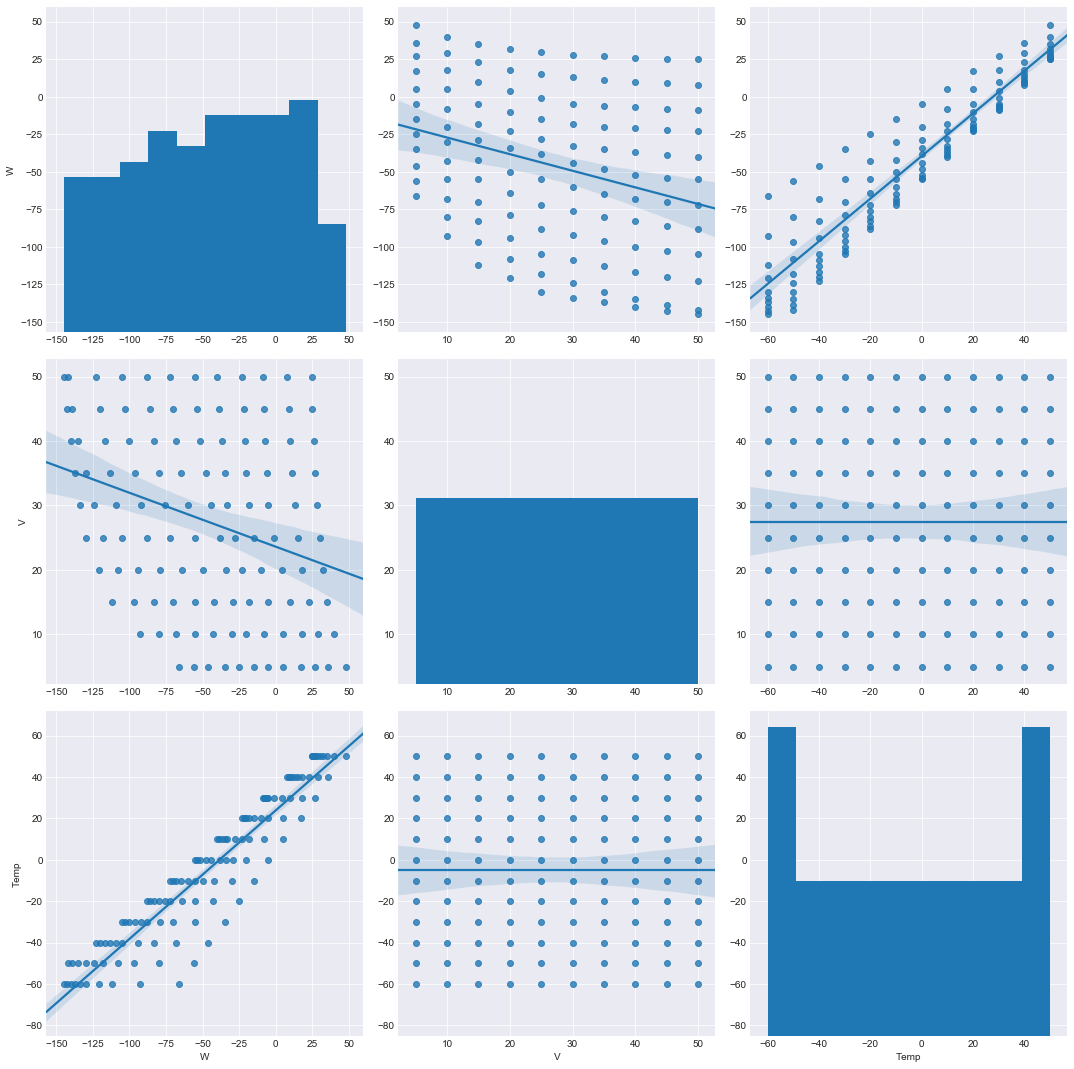

In [77]:
sns.pairplot(data_raw,kind="reg", palette="Set2", diag_kind= "hist", size=5)

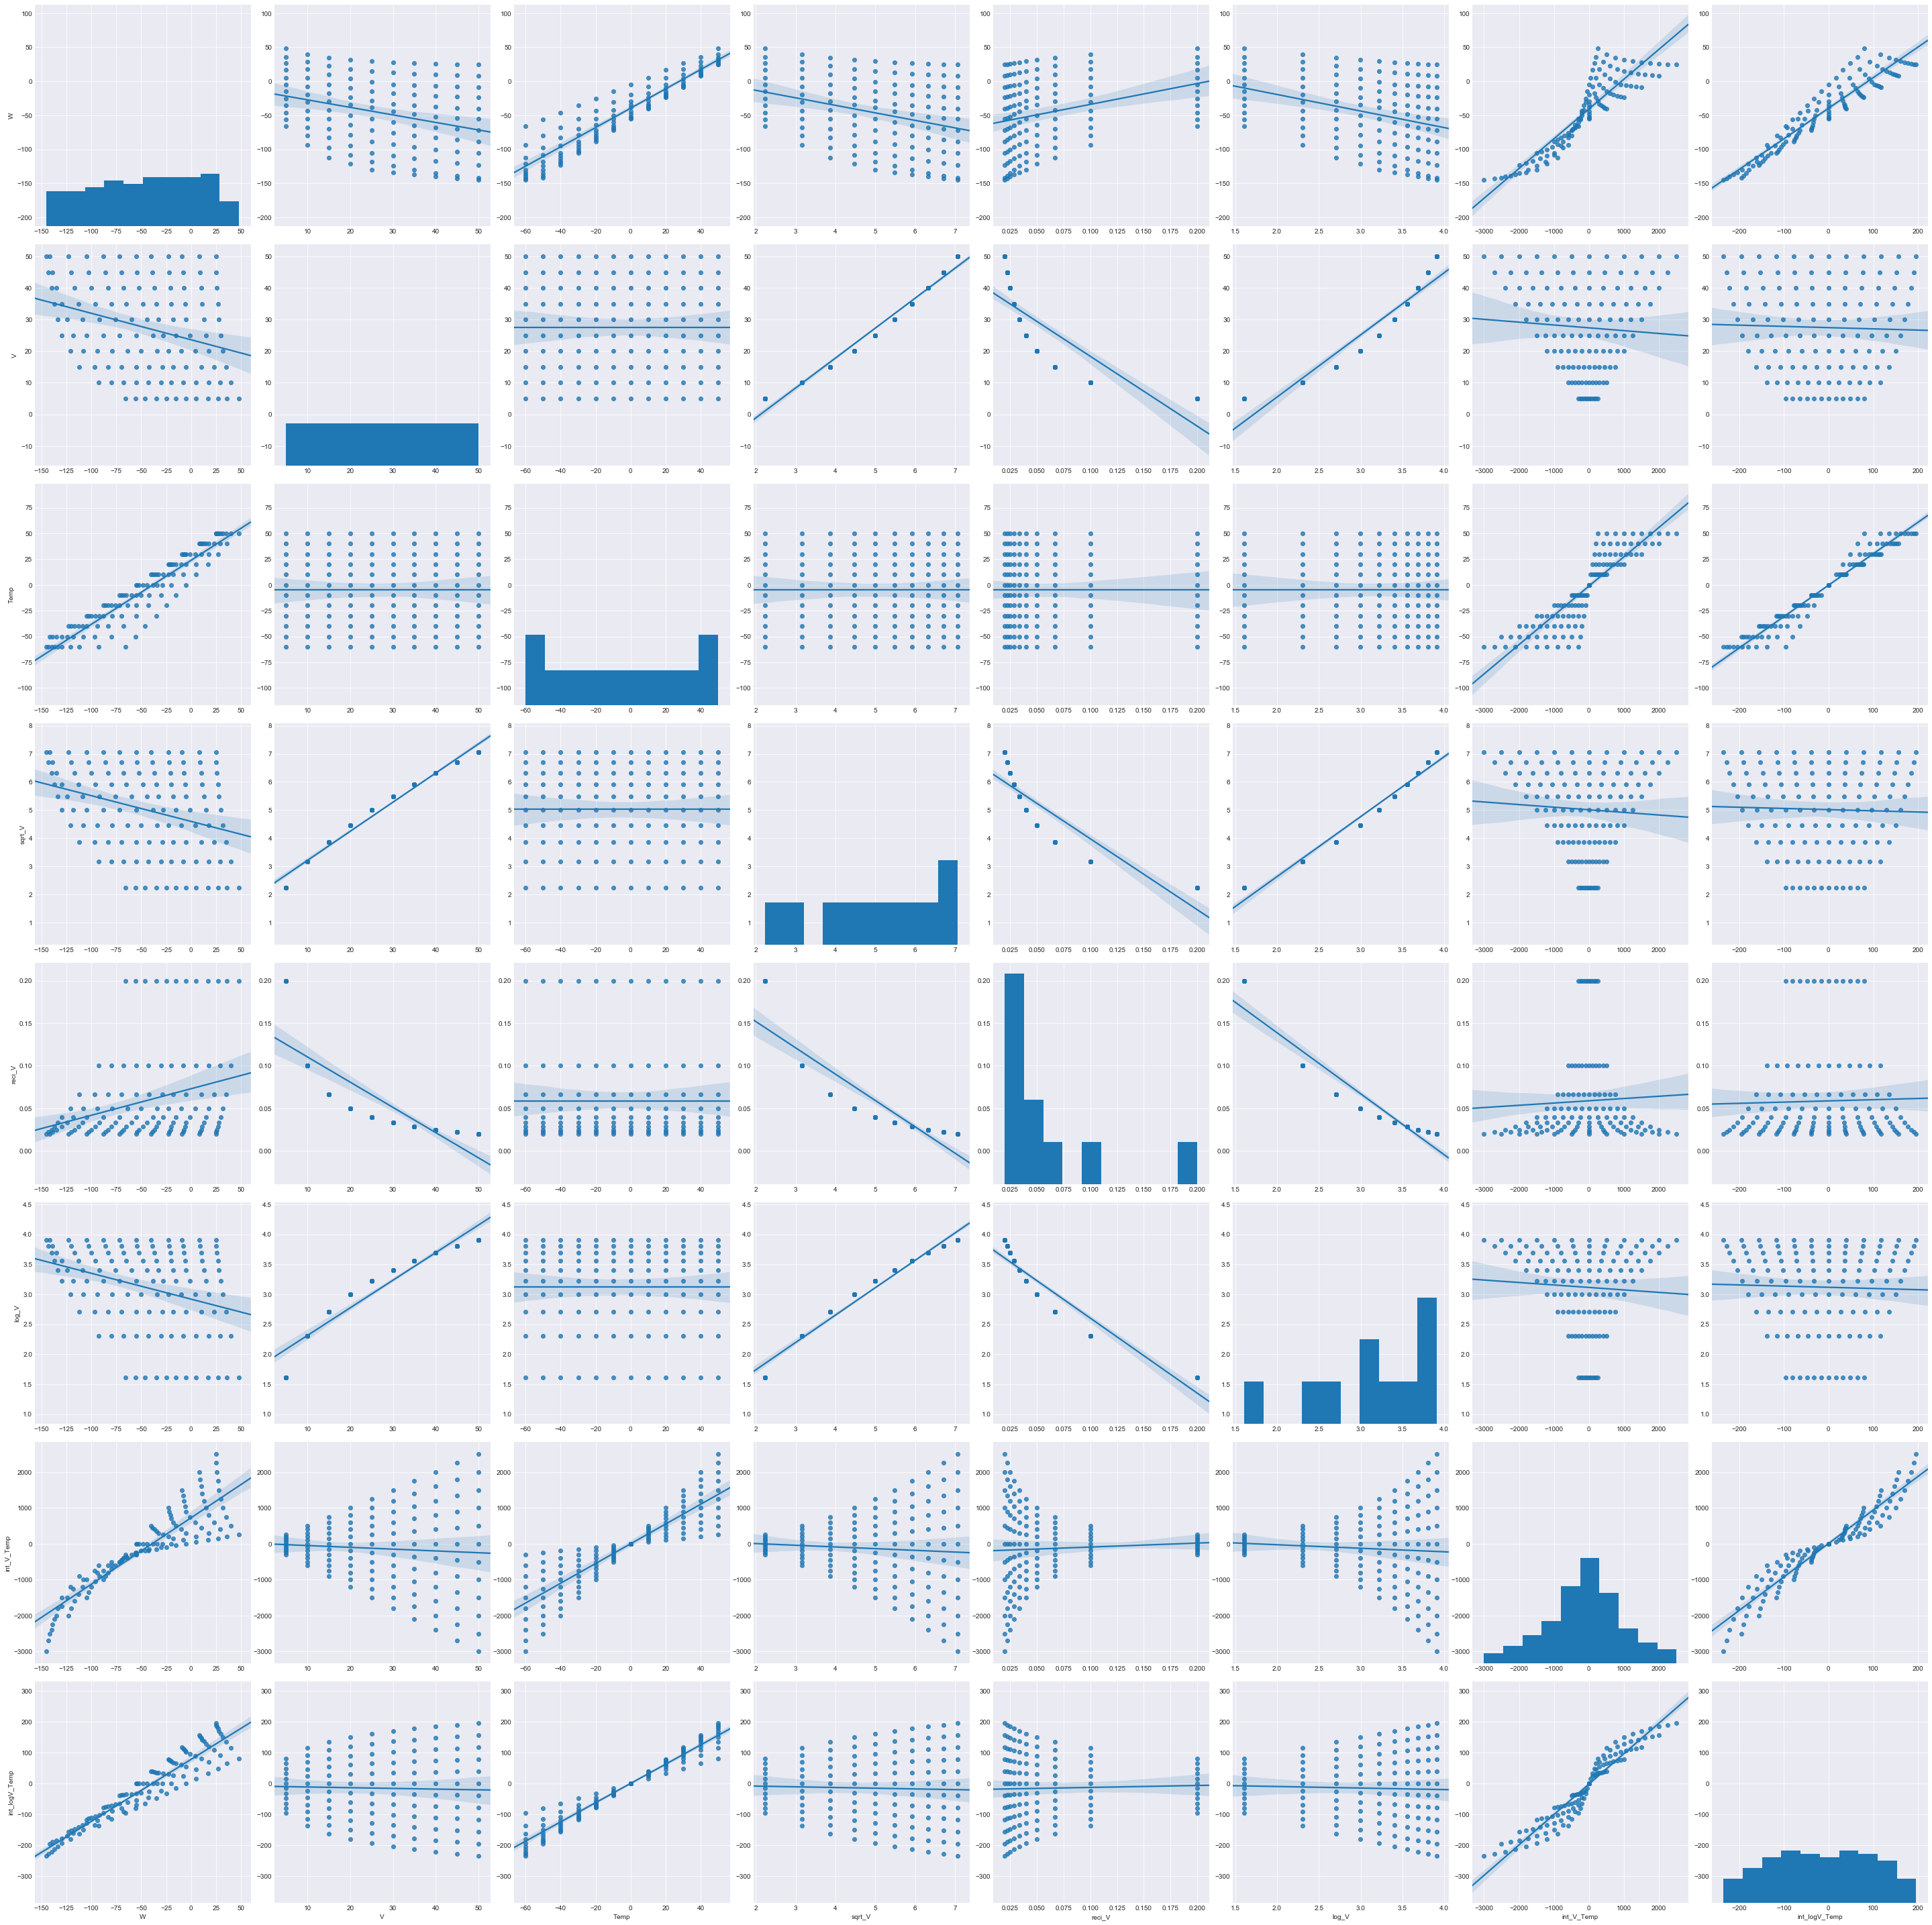

In [78]:
sns.pairplot(data,kind="reg", palette="Set2", diag_kind= "hist", size=5)

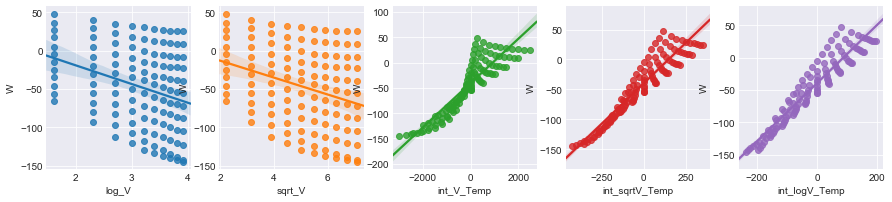

In [151]:

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5,  figsize = (15, 3))
sns.regplot(y = "W", x = "log_V", data= data, ax= ax1)
sns.regplot(y = "W", x = "sqrt_V", data= data, ax= ax2)
sns.regplot(y = "W", x = "int_V_Temp", data= data, ax= ax3)
sns.regplot(y = "W", x = "int_sqrtV_Temp", data= data, ax= ax4)
sns.regplot(y = "W", x = "int_logV_Temp", data= data, ax= ax5)

In [7]:
reg_model = sm.OLS(y, X).fit()

In [8]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     2101.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):           2.10e-92
Time:                        18:20:10   Log-Likelihood:                -428.36
No. Observations:                 120   AIC:                             862.7
Df Residuals:                     117   BIC:                             871.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0566      1.720     -5.267      0.000     -12.462      -5.651
V             -1.1055      0.055    -19.989      0.000      -1.215      -0.996
Temp           1.4187      0.023     61.661      0.000       1.373       1.464
==============================================================================
Omnibus:                       36.531   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.810
Skew:                           1.386   Prob(JB):                     2.30e-14
Kurtosis:                       5.209   Cond. No.                         77.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Residual')

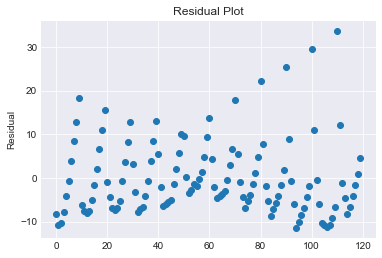

In [9]:
plt.scatter(y = reg_model.resid, x= range(len(reg_model.resid)))
plt.title("Residual Plot")
plt.ylabel("Residual")

Text(0.5,0.92,'3-D scatterplot')

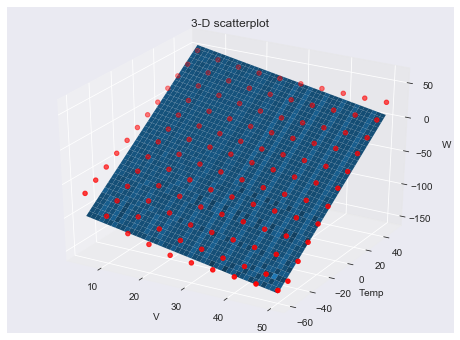

In [129]:
xx, yy = np.meshgrid(range( np.min(data.V), np.max(data.V)+1), range( np.min(data.Temp), np.max(data.Temp)+1) )
z = reg_model.params[0] + reg_model.params[1]*xx + reg_model.params[2]*yy

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.V, data.Temp, data.W, c="red", s= 20)
ax.plot_surface(xx, yy, z, alpha=1)
ax.set_xlabel('V')
ax.set_ylabel('Temp')
ax.set_zlabel('W')
ax.set_title("3-D scatterplot")

In [109]:
X2 = sm.add_constant(data[["V", "Temp", "log_V", "int_V_Temp", "int_logV_Temp"]])
reg_model2 = sm.OLS(y, X2).fit()
reg_model2.summary()

C:\Users\hawi7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.519e+04
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          3.44e-159
Time:                        19:57:29   Log-Likelihood:                -254.67
No. Observations:                 120   AIC:                             521.3
Df Residuals:                     114   BIC:                             538.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            37.3555      1.709     21.856      0.000      33.970      40.741
V                 0.1439      0.043      3.320      0.001       0.058       0.230
Temp              0.5795      0.049     11.827      0.000       0.482       0.677
log_V           -25.8887      0.895    -28.919      0.000     -27.662     -24.115
int_V_Temp       -0.0019      0.001     -1.516      0.132      -0.004       0.001
int_logV_Temp     0.2856      0.026     11.127      0.000       0.235       0.336
==============================================================================
Omnibus:                       18.557   Durbin-Watson:                   0.541
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.806
Skew:                           0.576   Prob(JB):                     8.36e-10
Kurtosis:                       5.652   Cond. No.                     1.10e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

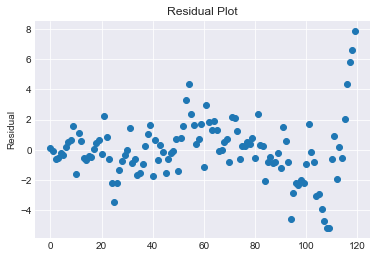

In [110]:
plt.scatter(y = reg_model2.resid, x= range(len(reg_model.resid)))
plt.title("Residual Plot")
plt.ylabel("Residual")

In [152]:
X3 = sm.add_constant(data[["V", "Temp", "log_V", "int_logV_Temp"]])

C:\Users\hawi7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [153]:
reg_model3 = sm.OLS(y, X3).fit()
reg_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.878e+04
Date:                Tue, 16 Apr 2019   Prob (F-statistic):          7.36e-161
Time:                        00:25:19   Log-Likelihood:                -255.87
No. Observations:                 120   AIC:                             521.7
Df Residuals:                     115   BIC:                             535.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            37.6741      1.706     22.086      0.000      34.295      41.053
V                 0.1533      0.043      3.554      0.001       0.068       0.239
Temp              0.6433      0.025     25.386      0.000       0.593       0.693
log_V           -26.0739      0.892    -29.236      0.000     -27.840     -24.307
int_logV_Temp     0.2485      0.008     31.352      0.000       0.233       0.264
==============================================================================
Omnibus:                       26.294   Durbin-Watson:                   0.531
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.082
Skew:                           0.788   Prob(JB):                     9.98e-16
Kurtosis:                       6.366   Cond. No.                     1.17e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

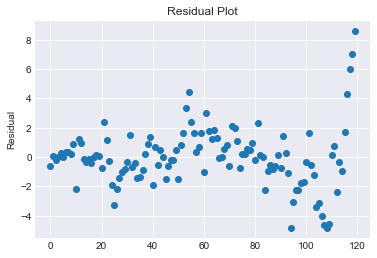

In [154]:
plt.scatter(y = reg_model3.resid, x= range(len(reg_model.resid)))
plt.title("Residual Plot")
plt.ylabel("Residual")

In [91]:
X4 = sm.add_constant(data[["V", "Temp", "int_logV_Temp"]])

C:\Users\hawi7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [93]:
reg_model4 = sm.OLS(y, X4).fit()
reg_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     2961.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          2.15e-109
Time:                        19:50:30   Log-Likelihood:                -383.80
No. Observations:                 120   AIC:                             775.6
Df Residuals:                     116   BIC:                             786.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.6967      1.200     -8.913      0.000     -13.074      -8.320
V                -1.0458      0.039    -27.041      0.000      -1.122      -0.969
Temp              0.6111      0.073      8.349      0.000       0.466       0.756
int_logV_Temp     0.2588      0.023     11.304      0.000       0.213       0.304
==============================================================================
Omnibus:                        9.768   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.099
Skew:                           0.672   Prob(JB):                      0.00641
Kurtosis:                       2.536   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Residual')

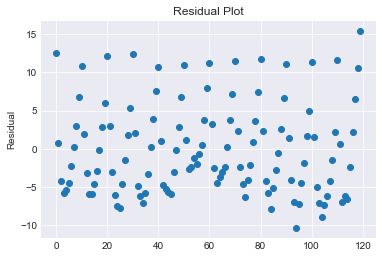

In [95]:
plt.scatter(y = reg_model4.resid, x= range(len(reg_model.resid)))
plt.title("Residual Plot")
plt.ylabel("Residual")

Text(0.5,0.92,'3-D scatterplot')

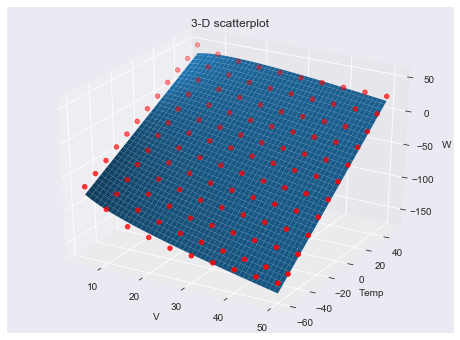

In [127]:
xx, yy = np.meshgrid(range( np.min(data.V), np.max(data.V)+1), range( np.min(data.Temp), np.max(data.Temp)+1),)
z = reg_model4.params[0] + reg_model4.params[1]*xx + reg_model4.params[2]*yy + reg_model4.params[3]*np.log(xx)*yy

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.V, data.Temp, data.W, c="red", s= 20)
ax.plot_surface(xx, yy, z, alpha=1)
ax.set_xlabel('V')
ax.set_ylabel('Temp')
ax.set_zlabel('W')
ax.set_title("3-D scatterplot")

In [119]:
X5 = sm.add_constant(data[["V", "Temp", "int_V_Temp"]])
reg_model5 = sm.OLS(y, X5).fit()
reg_model5.summary()

C:\Users\hawi7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2436.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          1.48e-104
Time:                        20:27:44   Log-Likelihood:                -395.33
No. Observations:                 120   AIC:                             798.7
Df Residuals:                     116   BIC:                             809.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6070      1.322     -8.023      0.000     -13.226      -7.988
V             -1.0491      0.043    -24.617      0.000      -1.133      -0.965
Temp           1.1086      0.038     29.247      0.000       1.034       1.184
int_V_Temp     0.0113      0.001      9.229      0.000       0.009       0.014
==============================================================================
Omnibus:                       14.179   Durbin-Watson:                   0.642
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.352
Skew:                           0.816   Prob(JB):                     0.000464
Kurtosis:                       3.640   Cond. No.                     2.36e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0,0.5,'Residual')

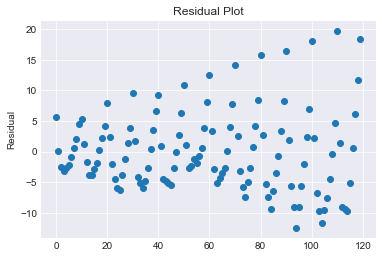

In [120]:
plt.scatter(y = reg_model5.resid, x= range(len(reg_model.resid)))
plt.title("Residual Plot")
plt.ylabel("Residual")

In [100]:
X6 = sm.add_constant(data[["V", "Temp", "log_V"]])
reg_model6 = sm.OLS(y, X6).fit()
reg_model6.summary()

C:\Users\hawi7\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2610.
Date:                Mon, 15 Apr 2019   Prob (F-statistic):          2.88e-106
Time:                        19:53:27   Log-Likelihood:                -391.25
No. Observations:                 120   AIC:                             790.5
Df Residuals:                     116   BIC:                             801.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.5512      5.234      7.939      0.000      31.184      51.918
V              0.1533      0.133      1.155      0.250      -0.110       0.416
Temp           1.4187      0.017     83.647      0.000       1.385       1.452
log_V        -27.3166      2.741     -9.966      0.000     -32.746     -21.887
==============================================================================
Omnibus:                        8.358   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.015   Jarque-Bera (JB):               15.357
Skew:                          -0.186   Prob(JB):                     0.000463
Kurtosis:                       4.713   Cond. No.                         359.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0,0.5,'Residual')

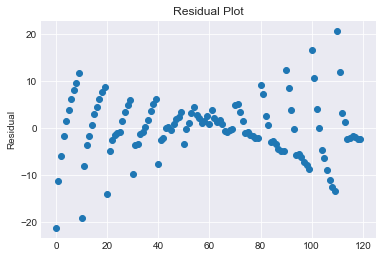

In [98]:
plt.scatter(y = reg_model6.resid, x= range(len(reg_model.resid)))
plt.title("Residual Plot")
plt.ylabel("Residual")

In [121]:
np.std(data.W)

52.19416474409122

In [122]:
data.corr()

,W,V,Temp,sqrt_V,reci_V,log_V,int_V_Temp,int_logV_Temp
W,1.000000,-0.304170,9.382903e-01,-0.317374,3.090268e-01,-3.238016e-01,0.899656,0.950417
V,-0.304170,1.000000,0.000000e+00,0.989184,-8.086306e-01,9.516624e-01,-0.066898,-0.029973
Temp,0.938290,0.000000,1.000000e+00,0.000000,-2.037818e-18,-4.933126e-18,0.884420,0.975563
sqrt_V,-0.317374,0.989184,0.000000e+00,1.000000,-8.823107e-01,9.861685e-01,-0.066175,-0.031060
reci_V,0.309027,-0.808631,-2.037818e-18,-0.882311,1.000000e+00,-9.467964e-01,0.054096,0.029820
log_V,-0.323802,0.951662,-4.933126e-18,0.986169,-9.467964e-01,1.000000e+00,-0.063665,-0.031496
int_V_Temp,0.899656,-0.066898,8.844195e-01,-0.066175,5.409603e-02,-6.366462e-02,1.000000,0.960392
int_logV_Temp,0.950417,-0.029973,9.755634e-01,-0.031060,2.981991e-02,-3.149559e-02,0.960392,1.000000
